## Importing Packages

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Importing Data

In [71]:
# df = pd.read_excel("C:/Users/UjjwalGupta/Downloads/Documents/Data_Train.xlsx")
df = pd.read_excel("C:/Users/UjjwalGupta/Downloads/Documents/Data_Train.xlsx")
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


## Data Information

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [73]:
df.shape

(10683, 11)

## Filtering Null Values

In [74]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [75]:
df.dropna(inplace=True)

In [76]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Finding Unique Values and Encoding

For better understanding of Machine

In [77]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [78]:
df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [79]:
df.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [80]:
df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [81]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [82]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [83]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

Additional Info is not a good distribution for training So we will remove this

In [84]:
df.drop('Additional_Info',axis=1,inplace=True)

In [85]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302


# Label Encoding for unique Values

In [86]:
from sklearn.preprocessing import LabelEncoder

In [87]:
encoder = LabelEncoder()

In [88]:
encoder.fit(df.Airline)

LabelEncoder()

In [89]:
df['Airline'] = encoder.transform(df.Airline)

In [90]:
encoder.classes_

array(['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet',
       'Vistara', 'Vistara Premium economy'], dtype=object)

In [91]:
df['Airline'].unique()

array([ 3,  1,  4,  8,  6,  2, 10,  0, 11,  5,  7,  9])

In [92]:
df['Source'] = encoder.fit_transform(df['Source'])

In [93]:
encoder.classes_

array(['Banglore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai'], dtype=object)

In [94]:
df['Destination'] = encoder.fit_transform(df['Destination'])

In [95]:
encoder.classes_

array(['Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype=object)

In [96]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Price'],
      dtype='object')

In [97]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [98]:
df['Total_Stops'] = df.Total_Stops.apply(lambda x:'0 stop' if x=='non-stop' else x)

In [99]:
df['Total_Stops'] = df.Total_Stops.apply(lambda x:int(x.split()[0]))

In [100]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,3,24/03/2019,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,3897
1,1,1/05/2019,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,7662
2,4,9/06/2019,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,13882
3,3,12/05/2019,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,1,6218
4,3,01/03/2019,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,1,13302


## Working With Time

In [101]:
df['Date_of_Journey'] =pd.to_datetime(df['Date_of_Journey'])

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  int32         
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  int32         
 3   Destination      10682 non-null  int32         
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  object        
 6   Arrival_Time     10682 non-null  object        
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  int64         
 9   Price            10682 non-null  int64         
dtypes: datetime64[ns](1), int32(3), int64(2), object(4)
memory usage: 792.8+ KB


dep_time to dep_time hour of the day

In [103]:
df['Dep_Time'] = df.Dep_Time.apply(lambda x:int(x.split(':')[0]))

same for arriving time

In [104]:
df['Arrival_Time'] = df.Arrival_Time.apply(lambda x:int(x.split(':')[0]))

Adjustments with time

In [105]:
df['Arrival_Time'] = df[['Dep_Time','Arrival_Time']].apply(lambda x:x['Arrival_Time']+24 if x['Dep_Time']>x['Arrival_Time'] else x['Arrival_Time'],axis=1)

Note: - Arrival time is shown as Dep_time + Duration Time

In [106]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,3,2019-03-24,0,5,BLR → DEL,22,25,2h 50m,0,3897
1,1,2019-01-05,3,0,CCU → IXR → BBI → BLR,5,13,7h 25m,2,7662
2,4,2019-09-06,2,1,DEL → LKO → BOM → COK,9,28,19h,2,13882
3,3,2019-12-05,3,0,CCU → NAG → BLR,18,23,5h 25m,1,6218
4,3,2019-01-03,0,5,BLR → NAG → DEL,16,21,4h 45m,1,13302


In [107]:
df['Month_of_Journey'] =  df['Date_of_Journey'].map(lambda x:x.month)

Duration in minutes

In [108]:
def duration_time(x):
    x = x.split()
    x = list(map(lambda t:int(t[:-1]),x))
    if len(x) == 1:
        return x[0]*60
    else:
        return x[0]*60 + x[1]

In [109]:
df['Duration'] =  df['Duration'].apply(duration_time)

In [110]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Month_of_Journey
0,3,2019-03-24,0,5,BLR → DEL,22,25,170,0,3897,3
1,1,2019-01-05,3,0,CCU → IXR → BBI → BLR,5,13,445,2,7662,1
2,4,2019-09-06,2,1,DEL → LKO → BOM → COK,9,28,1140,2,13882,9
3,3,2019-12-05,3,0,CCU → NAG → BLR,18,23,325,1,6218,12
4,3,2019-01-03,0,5,BLR → NAG → DEL,16,21,285,1,13302,1


## Target data visualization

C:\Users\UjjwalGupta\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price'>

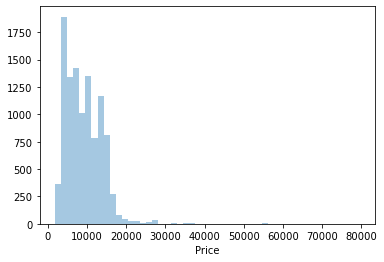

In [111]:
sns.distplot(df['Price'],kde=False)

As you can see output data is not Distributed Uniformally To make it uniform we will remove data of price > 40000

In [112]:
df[df['Price']>40000]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Month_of_Journey
657,5,2019-01-03,0,5,BLR → BOM → DEL,5,10,300,1,52229,1
1478,4,2019-03-18,0,5,BLR → BOM → DEL,18,24,365,1,54826,3
2618,4,2019-03-18,0,5,BLR → BOM → DEL,22,29,375,1,54826,3
2924,5,2019-01-03,0,5,BLR → BOM → DEL,5,11,340,1,79512,1
5372,5,2019-01-03,0,5,BLR → BOM → DEL,5,12,400,1,62427,1
5439,4,2019-01-03,0,5,BLR → BOM → DEL,16,23,365,1,54826,1
7351,5,2019-03-03,2,1,DEL → ATQ → BOM → COK,20,28,500,2,46490,3
9715,5,2019-06-03,2,1,DEL → ATQ → BOM → COK,20,28,500,2,52285,6
10364,5,2019-01-03,0,5,BLR → MAA → DEL,9,14,280,1,57209,1


In [113]:
df.drop(df[df['Price']>40000].index,inplace=True)

C:\Users\UjjwalGupta\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price'>

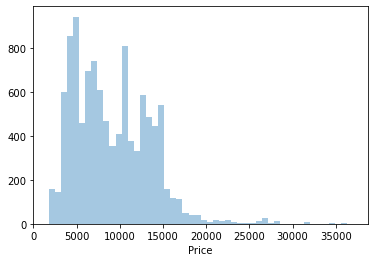

In [114]:
sns.distplot(df['Price'],kde=False)

Better than Before

## Inputs for Model

In [115]:
df._get_numeric_data().head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Month_of_Journey
0,3,0,5,22,25,170,0,3897,3
1,1,3,0,5,13,445,2,7662,1
2,4,2,1,9,28,1140,2,13882,9
3,3,3,0,18,23,325,1,6218,12
4,3,0,5,16,21,285,1,13302,1


In [116]:
X = df._get_numeric_data().drop('Price',axis=1)

In [117]:
y = df['Price']

Splitting of Data in the ratio of 70% , 30% for testing

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model Building

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
model  = LinearRegression()

In [122]:
model.fit(X_train,y_train)

LinearRegression()

Model Evaluation

In [123]:
predictions = model.predict(X_test)

## Predictions Visualization

C:\Users\UjjwalGupta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

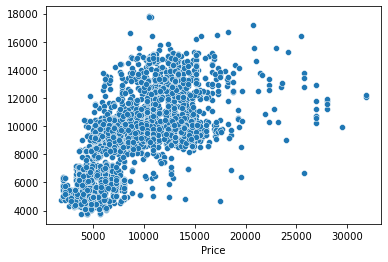

In [124]:
sns.scatterplot(y_test,predictions)

C:\Users\UjjwalGupta\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price'>

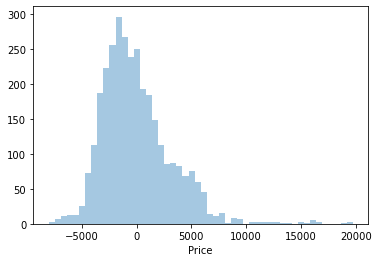

In [125]:
sns.distplot((y_test-predictions),bins=50,kde=False)

-> Looking at the visualization we can tell that scatterplot fits around a Straight line .

-> It means that Model is not evaluating randomly

-> And It works Good

## Error Calculation

In [126]:
from sklearn import metrics

In [127]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2417.970504047836
MSE: 10202567.00494085
RMSE: 3194.1457394647555


## Output:

This model is predicting values of the fare with an error of 2400 rs.

This Output also contains price above 35000 so it's not a bad prediction